In [54]:
base_dir = './BanglaDigit_Data/dataset'

In [55]:
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [56]:
import tensorflow as tf

In [57]:
# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(32, 32, 1)))

# convolutional layer 2
model.add(Conv2D(32, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#convolution layer 3
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
# output layer
model.add(Dense(10, activation='softmax'))



In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        832       
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [59]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])
# compiling the sequential model
# model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0, width_shift_range=0.1,
                                           height_shift_range=0.1,
                                           validation_split=0.15
                                           # vertical_flip=True,zoom_range=0.2
                                           )

# Flow training images in batches of 20 using train_datagen generator
train_it = train_datagen.flow_from_directory(base_dir, class_mode="categorical",color_mode="grayscale",
                                                 batch_size=10, target_size=(32, 32), subset='training',
                                                 shuffle=True)  # target_size could be(128,128)
test_it = train_datagen.flow_from_directory(base_dir, class_mode="categorical",color_mode="grayscale",
                                                batch_size=10, target_size=(32, 32), subset='validation',
                                                shuffle=True)

Found 402 images belonging to 10 classes.
Found 68 images belonging to 10 classes.


In [61]:
history = model.fit(train_it, steps_per_epoch=len(train_it),validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=1)

Epoch 1/50
41/41 [==============================] - 5s 100ms/step - loss: 2.4619 - accuracy: 0.0746 - val_loss: 2.3021 - val_accuracy: 0.1176
Epoch 2/50
41/41 [==============================] - 4s 94ms/step - loss: 2.3130 - accuracy: 0.0896 - val_loss: 2.3016 - val_accuracy: 0.1471
Epoch 3/50
41/41 [==============================] - 4s 92ms/step - loss: 2.3049 - accuracy: 0.0896 - val_loss: 2.2864 - val_accuracy: 0.2059
Epoch 4/50
41/41 [==============================] - 4s 90ms/step - loss: 2.0096 - accuracy: 0.3010 - val_loss: 1.8364 - val_accuracy: 0.3676
Epoch 5/50
41/41 [==============================] - 4s 89ms/step - loss: 1.5942 - accuracy: 0.4602 - val_loss: 1.5108 - val_accuracy: 0.4412
Epoch 6/50
41/41 [==============================] - 4s 98ms/step - loss: 1.3398 - accuracy: 0.5821 - val_loss: 1.3501 - val_accuracy: 0.5588
Epoch 7/50
41/41 [==============================] - 4s 95ms/step - loss: 1.2423 - accuracy: 0.6020 - val_loss: 1.0840 - val_accuracy: 0.6912
Epoch 8/50
4

In [62]:
model.save("Mathnet.h5")

In [63]:
_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)

In [64]:
print('Accuracy of test> %.3f' % (acc * 100.0))

Accuracy of test> 80.882


Text(0.5, 1.0, 'Training and validation loss')

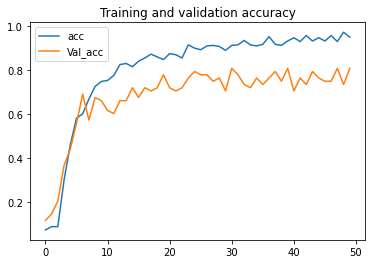

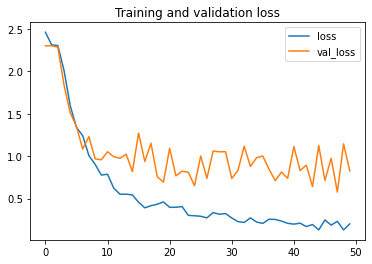

In [65]:
import matplotlib.pyplot as plt
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label = 'acc')
plt.plot(epochs, val_acc , label = 'Val_acc')
plt.legend()
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label = 'loss')
plt.plot(epochs, val_loss, label = 'val_loss')
plt.legend()
plt.title('Training and validation loss')

In [66]:
y_pred = model.predict(test_it)

In [67]:
import numpy as np
y_pred_t = np.argmax(y_pred, axis = 1)
y_pred_t

array([1, 3, 1, 7, 6, 2, 6, 2, 9, 0, 8, 7, 9, 2, 9, 0, 7, 1, 3, 4, 7, 2,
       1, 8, 6, 9, 6, 1, 4, 0, 6, 1, 0, 2, 7, 7, 6, 0, 2, 1, 9, 9, 5, 7,
       5, 5, 0, 3, 2, 7, 0, 9, 1, 9, 5, 8, 6, 1, 0, 2, 3, 5, 8, 3, 7, 4,
       2, 8], dtype=int64)

In [68]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_it.labels, y_pred_t)

In [69]:
conf_mat

array([[0, 2, 1, 1, 0, 0, 1, 1, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 1, 1, 2],
       [1, 1, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 0, 2, 1, 1, 1],
       [2, 2, 0, 0, 1, 0, 1, 0, 0, 0],
       [1, 1, 2, 0, 0, 0, 1, 2, 0, 0],
       [1, 0, 0, 0, 0, 3, 0, 1, 0, 2],
       [1, 1, 1, 1, 0, 0, 0, 1, 0, 2],
       [1, 1, 1, 1, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 1, 1, 0, 1, 2, 0]], dtype=int64)